Informática - 1º de Física
<br>
**Introducción a la Programación**
<br>
<p style="color:#808080"> <small><small>
5/11/2018
</small></small></p>

## Tema 5. Arrays

Como anticipamos al hablar de los contenedores, el [array](https://en.wikipedia.org/wiki/Array_data_type) es el tipo de dato fundamental para la computación científica.

Es una estructura multidimensional cuyos elementos se especifican con una secuencia de índices. Un array de dimensión 1 es como un vector, cuyos elementos se especifican como `a[j]`. Un array de dimensión 2 es como una matriz, cuyos elementos se especifican con dos índices: `a[i,j]` (i-ésima fila, j-ésima columna). Un array de dimensión 3 admite tres índices `a[i,j,k]` (fila, columna, capa). Y así sucesivamente. Esta referencia a elementos de un array con el corchete se llama indexado.

La característica fundamental de los arrays es que podemos operar con todos sus elementos de forma automática sin bucles ni indexado explícito. Esto permite expresar los algoritmos de análisis de datos de forma muy elegante.

Las operaciones con arrays están disponibles en el módulo [numpy](https://en.wikipedia.org/wiki/NumPy), que es el corazón del ecosistema de computación científica de Python ([scipy](https://www.scipy.org/)), y una de las causas de la gran popularidad que ha adquirido este lenguaje.

Estas funciones pueden agruparse en las siguientes categorías:

- creación de arrays

- inspección de estructura

- operaciones "vectorizadas" con *broadcasting* automático

- *slicing* (troceado) y reconfiguración

- *masks* (selección de elementos en base a condiciones lógicas)

- álgebra lineal

### Motivación

Recordemos el ejercicio en el que se nos pedía definir una función para calcular la distancia entre dos puntos. Si los argumentos se almacenan en tuplas o listas es necesario extraer y operar explícitamente con las coordenadas. Utilizando arrays se consigue una definición mucho [más directa y sencilla](dist.ipynb).

### Operaciones básicas

A continuación mostramos algunos ejemplos de uso de las funciones más importantes. La tradición es usar el prefijo `np` para indicar las funciones que trabajan con arrays. 

In [1]:
import numpy as np

Construcción a partir de listas (u otros contenedores):

In [2]:
v = np.array([2,-3,7])

In [3]:
v[1]

-3

In [4]:
m = np.array([[5,3, 2,10],
              [2,0, 7, 0],
              [1,1,-3, 6]])

In [5]:
m[1,2]

7

In [6]:
m[2]

array([ 1,  1, -3,  6])

Inspección de su tipo y estructura:

In [7]:
type(m)

numpy.ndarray

In [8]:
m.dtype

dtype('int64')

In [9]:
m.shape

(3, 4)

In [10]:
m.ndim

2

In [11]:
len(m)

3

In [12]:
m.size

12

Operaciones elemento a elemento automáticas:

In [13]:
v * np.array([10,0,5])

array([20,  0, 35])

In [14]:
5*m + 2

array([[ 27,  17,  12,  52],
       [ 12,   2,  37,   2],
       [  7,   7, -13,  32]])

Constructores especiales:

In [15]:
np.zeros([2,3])

array([[0., 0., 0.],
       [0., 0., 0.]])

In [16]:
np.ones([4])

array([1., 1., 1., 1.])

In [17]:
np.linspace(0,5,11)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [18]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [19]:
np.arange(1,10,0.5)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ,
       7.5, 8. , 8.5, 9. , 9.5])

In [20]:
np.eye(7)

array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])

Iteración, a lo largo de la primera dimensión:

In [21]:
for e in np.ones(4):
    print(e)

1.0
1.0
1.0
1.0


In [22]:
for e in m:
    print(e)

[ 5  3  2 10]
[2 0 7 0]
[ 1  1 -3  6]


In [23]:
sum(m)

array([ 8,  4,  6, 16])

In [24]:
np.sum(m,axis=1)

array([20,  9,  5])

Operaciones matriciales:

In [25]:
m.T

array([[ 5,  2,  1],
       [ 3,  0,  1],
       [ 2,  7, -3],
       [10,  0,  6]])

In [26]:
v = np.array([3,2,-5,8])

El operador `@` (abreviatura de la función [np.dot](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.dot.html)) es el producto de matrices, el producto matriz-vector y, en general, realiza la [contracción](https://en.wikipedia.org/wiki/Tensor_contraction) de dos arrays multidimensionales.

In [27]:
m @ v

array([ 91, -29,  68])

In [28]:
np.diag([10,0,1]) @ m

array([[ 50,  30,  20, 100],
       [  0,   0,   0,   0],
       [  1,   1,  -3,   6]])

Funciones matemáticas optimizadas para arrays, elemento a elemento:

In [29]:
x = np.linspace(0,2*np.pi,30)

x

array([0.        , 0.21666156, 0.43332312, 0.64998469, 0.86664625,
       1.08330781, 1.29996937, 1.51663094, 1.7332925 , 1.94995406,
       2.16661562, 2.38327719, 2.59993875, 2.81660031, 3.03326187,
       3.24992343, 3.466585  , 3.68324656, 3.89990812, 4.11656968,
       4.33323125, 4.54989281, 4.76655437, 4.98321593, 5.1998775 ,
       5.41653906, 5.63320062, 5.84986218, 6.06652374, 6.28318531])

In [30]:
y = np.sin(x) + np.cos(2*x)
y

array([ 1.        ,  1.12254586,  1.06727539,  0.87270255,  0.60038006,
        0.32232498,  0.10669282,  0.00439546,  0.03917335,  0.20298123,
        0.45755084,  0.74183837,  0.9839623 ,  1.1153946 ,  1.08473957,
        0.86850154,  0.47679154, -0.04714542, -0.63356055, -1.19782715,
       -1.65497221, -1.93447969, -1.99267137, -1.82040717, -1.44469911,
       -0.92394405, -0.33764588,  0.22749718,  0.69260498,  1.        ])

Los arrays son el tipo de datos que normalmente se utiliza para producir gráficas, como veremos en detalle en el siguiente capítulo.

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

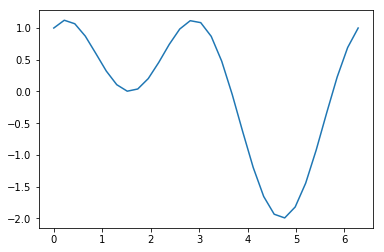

In [32]:
plt.plot(x,y);

Reconfiguración de los elementos:

In [33]:
np.arange(12).reshape(3,2,2)

array([[[ 0,  1],
        [ 2,  3]],

       [[ 4,  5],
        [ 6,  7]],

       [[ 8,  9],
        [10, 11]]])

In [34]:
np.arange(5).reshape(-1,1)

array([[0],
       [1],
       [2],
       [3],
       [4]])

### Matrices por bloques

In [35]:
np.append(m,[[100,200,300,400],
             [0,  10,  0,  1] ],axis=0)

array([[  5,   3,   2,  10],
       [  2,   0,   7,   0],
       [  1,   1,  -3,   6],
       [100, 200, 300, 400],
       [  0,  10,   0,   1]])

In [36]:
np.hstack([np.zeros([3,3]),np.ones([3,2])])

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [37]:
np.vstack([np.eye(3),5*np.ones([2,3])])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [5., 5., 5.],
       [5., 5., 5.]])

numpy proporciona un tipo especial `matrix` para los arrays de 2 dimensiones pero [se recomienda no usarlo](https://stackoverflow.com/questions/4151128/what-are-the-differences-between-numpy-arrays-and-matrices-which-one-should-i-u) o usarlo con cuidado. Por ejemplo, `bmat` puede ser más cómodo que una combinación de `vstack` y `hstack`. Si lo usamos siempre podemos convertir el resultado en un array normal.

In [38]:
m = np.arange(12).reshape([3,4])

M = np.bmat([[m,         np.zeros([3,3])]
            ,[np.eye(3), np.ones([3,4]) ]])
M

matrix([[ 0.,  1.,  2.,  3.,  0.,  0.,  0.],
        [ 4.,  5.,  6.,  7.,  0.,  0.,  0.],
        [ 8.,  9., 10., 11.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  0.,  1.,  1.,  1.,  1.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.]])

In [39]:
np.array(M)

array([[ 0.,  1.,  2.,  3.,  0.,  0.,  0.],
       [ 4.,  5.,  6.,  7.,  0.,  0.,  0.],
       [ 8.,  9., 10., 11.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  1.,  0.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  1.,  1.,  1.,  1.,  1.]])

### Automatic broadcasting

Las operaciones elemento a elemento argumentos con las mismas dimensiones. Pero si alguna dimensión es igual a uno, se sobreentiende que los elementos se replican en esa dimensión para coincidir con el otro array.

In [40]:
m = np.array([[1, 2, 3, 4]
             ,[5, 6, 7, 8]
             ,[9,10,11,12]])

In [41]:
m + [[10],
     [20],
     [30]]

array([[11, 12, 13, 14],
       [25, 26, 27, 28],
       [39, 40, 41, 42]])

In [42]:
m + [100,200,300,400]

array([[101, 202, 303, 404],
       [105, 206, 307, 408],
       [109, 210, 311, 412]])

In [43]:
np.array([[1,2,3,4]])   + np.array([[100],
                                    [200],
                                    [300]])

array([[101, 102, 103, 104],
       [201, 202, 203, 204],
       [301, 302, 303, 304]])

### Slices

Extracción de elementos y "submatrices" o "subarrays", seleccionando intervalos de filas, columnas, etc.:

In [44]:
m = np.arange(42).reshape(6,7)
m

array([[ 0,  1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25, 26, 27],
       [28, 29, 30, 31, 32, 33, 34],
       [35, 36, 37, 38, 39, 40, 41]])

In [45]:
m[1,2]

9

In [46]:
m[2:5,1:4]

array([[15, 16, 17],
       [22, 23, 24],
       [29, 30, 31]])

In [47]:
m[:3, 4:]

array([[ 4,  5,  6],
       [11, 12, 13],
       [18, 19, 20]])

In [48]:
m[[1,0,0,2,1],:]

array([[ 7,  8,  9, 10, 11, 12, 13],
       [ 0,  1,  2,  3,  4,  5,  6],
       [ 0,  1,  2,  3,  4,  5,  6],
       [14, 15, 16, 17, 18, 19, 20],
       [ 7,  8,  9, 10, 11, 12, 13]])

Los índices negativos indican que se empieza a contar desde el final.

In [49]:
# las dos últimas columnas y todas las filas menos las tres últimas.
m[:-3,-2:]

array([[ 5,  6],
       [12, 13],
       [19, 20]])

In [50]:
# la penúltima columna
m[:,-2]

array([ 5, 12, 19, 26, 33, 40])

In [51]:
# la penúltima columna pero como array 2D (matriz), para que se vea como un vector columna
m[:,[-2]]

array([[ 5],
       [12],
       [19],
       [26],
       [33],
       [40]])

### Masks

Son arrays de valores lógicos.

Extracción de elementos que cumplen una condición:

In [52]:
n = np.arange(10)

n

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [53]:
n < 5

array([ True,  True,  True,  True,  True, False, False, False, False,
       False])

In [54]:
n[n<5]

array([0, 1, 2, 3, 4])

Reducción de arrays lógicos:

In [55]:
np.all( n > 3 )

False

In [56]:
np.any( n == 2 )

True

Operaciones similares a list comprehensions:

In [57]:
k = np.arange(1,101)

(k ** 2)[(k>10) & (k**3 < 2000)]

array([121, 144])

### Lectura desde archivo

Los arrays se pueden guardar en ficheros de [texto plano](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savetxt.html#numpy.savetxt) o en un [formato comprimido especial](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.savez_compressed.html#numpy.savez_compressed) para su uso posterior.

En la carpeta `datos` hay un archivo de texto con una tabla de números. Puedes abrirlo con jupyter para echar un vistazo.

In [58]:
hubble = np.loadtxt('datos/hubble-0.txt')
hubble

array([[1.8287e+04, 6.0998e-02, 1.7620e+01],
       [5.6910e+03, 1.8983e-02, 1.5000e+01],
       [2.6382e+04, 8.8000e-02, 1.8590e+01],
       [5.9960e+03, 2.0000e-02, 1.5540e+01],
       [1.9202e+04, 6.4051e-02, 1.5300e+01],
       [2.3684e+04, 7.9000e-02, 1.6560e+01],
       [1.1702e+04, 3.9034e-02, 1.7140e+01],
       [1.7284e+04, 5.7653e-02, 1.3500e+01],
       [1.3491e+04, 4.5000e-02, 1.7800e+01],
       [1.0566e+04, 3.5244e-02, 1.5250e+01],
       [1.4718e+04, 4.9094e-02, 1.5600e+01],
       [1.3491e+04, 4.5000e-02, 1.4520e+01],
       [1.6325e+04, 5.4453e-02, 1.5300e+01],
       [2.0686e+04, 6.9000e-02, 1.6800e+01],
       [1.8080e+03, 6.0310e-03, 1.1160e+01],
       [7.6030e+03, 2.5361e-02, 1.5180e+01],
       [1.0180e+03, 3.3950e-03, 1.2240e+01],
       [3.2100e+02, 1.0710e-03, 1.3000e+01],
       [3.1060e+03, 1.0360e-02, 1.2490e+01],
       [9.4260e+03, 3.1442e-02, 1.4530e+01],
       [7.4640e+03, 2.4897e-02, 1.5210e+01],
       [1.5143e+04, 5.0512e-02, 1.7400e+01],
       [4.

Las filas son casos observados y las columnas son las variables medidas.

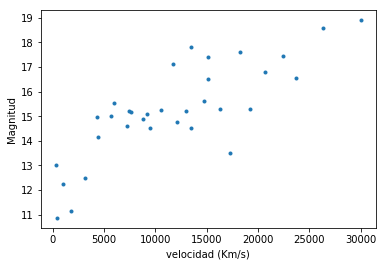

In [59]:
vel = hubble[:,0]
mag = hubble[:,2]

# también podemos dar nombre a las columnas así:
# vel, reds, mag = hubble.T

plt.plot(vel,mag,'.')
plt.xlabel('velocidad (Km/s)')
plt.ylabel('Magnitud');

Hay otra versión de los mismos datos que contiene comentarios y una cabecera con los nombres de las columnas. Comienza así:

    # https://ned.ipac.caltech.edu/cgi-bin/objsearch?refcode=1996AJ....112.2398H&search_type=Search&of=pre_text
    V(km/s) Redshift Magnitud
    # v        z       m
    18287  0.060998  17.62
    5691   0.018983  15.00 
    26382  0.088000  18.59
    ...

Se puede leer saltando filas:

In [60]:
hubble = np.loadtxt('datos/hubble.txt', skiprows=2)
hubble

array([[1.8287e+04, 6.0998e-02, 1.7620e+01],
       [5.6910e+03, 1.8983e-02, 1.5000e+01],
       [2.6382e+04, 8.8000e-02, 1.8590e+01],
       [5.9960e+03, 2.0000e-02, 1.5540e+01],
       [1.9202e+04, 6.4051e-02, 1.5300e+01],
       [2.3684e+04, 7.9000e-02, 1.6560e+01],
       [1.1702e+04, 3.9034e-02, 1.7140e+01],
       [1.7284e+04, 5.7653e-02, 1.3500e+01],
       [1.3491e+04, 4.5000e-02, 1.7800e+01],
       [1.0566e+04, 3.5244e-02, 1.5250e+01],
       [1.4718e+04, 4.9094e-02, 1.5600e+01],
       [1.3491e+04, 4.5000e-02, 1.4520e+01],
       [1.6325e+04, 5.4453e-02, 1.5300e+01],
       [2.0686e+04, 6.9000e-02, 1.6800e+01],
       [1.8080e+03, 6.0310e-03, 1.1160e+01],
       [7.6030e+03, 2.5361e-02, 1.5180e+01],
       [1.0180e+03, 3.3950e-03, 1.2240e+01],
       [3.2100e+02, 1.0710e-03, 1.3000e+01],
       [3.1060e+03, 1.0360e-02, 1.2490e+01],
       [9.4260e+03, 3.1442e-02, 1.4530e+01],
       [7.4640e+03, 2.4897e-02, 1.5210e+01],
       [1.5143e+04, 5.0512e-02, 1.7400e+01],
       [4.

La función `np.loadtxt` admite también archivos remotos, que pueden incluso estar comprimidos:

In [61]:
hubble = np.loadtxt('http://robot.inf.um.es/material/data/hubble.txt.bz2', skiprows=2)
hubble.shape

(33, 3)

Finalmente, el módulo `pandas` proporciona el tipo "dataframe", muy utilizado en análisis de datos y que estudiaremos más adelante.

In [62]:
import pandas as pd

df = pd.read_table('https://robot.inf.um.es/material/data/ConstanteHubbleDatos-1.txt', sep='\s+', comment='#')
df

,V(km/s),Redshift,Magnitud
0,18287,0.060998,17.62
1,5691,0.018983,15.00
2,26382,0.088000,18.59
3,5996,0.020000,15.54
4,19202,0.064051,15.30
5,23684,0.079000,16.56
6,11702,0.039034,17.14
7,17284,0.057653,13.50
8,13491,0.045000,17.80
9,10566,0.035244,15.25


Más adelante estudiaremos los dataframes. Por ahora convertimos los datos a un array normal.

### Números pseudoaleatorios

`numpy` permite generar arrays de números pseudoaleatorios con diferentes tipos de distribuciones (uniforme, normal, etc.).

In [63]:
# enteros uniformemente distribuidos en un intervalo
np.random.randint(1, 6+1, (3,4))

array([[5, 5, 6, 5],
       [3, 6, 4, 4],
       [3, 6, 3, 6]])

In [64]:
# reales entre cero y 1, uniformemente distribuidos
np.random.rand(3,4)

array([[0.60184502, 0.90589449, 0.38928976, 0.22202508],
       [0.24238494, 0.32883539, 0.59397996, 0.41606641],
       [0.93778297, 0.74478597, 0.97198976, 0.08054841]])

In [65]:
# reales con distribución normal (gaussiana) con media cero y varianza 1
np.random.randn(2,5)

array([[ 1.09066154,  0.63316053,  0.2974746 , -0.73775657,  1.05750795],
       [ 0.41102786,  0.93211374, -0.96419453, -0.26711439, -0.30095358]])

### Estadística descriptiva

`numpy` proporciona funciones de estadística descriptiva para calcular características de conjuntos de datos tales como la media, mediana, desviación típica, máximo y mínimo, etc. Todas estas funciones de "reducción" de arrays pueden actuar sobre el array completo, por filas o por columnas, dependiendo del argumento opcional `axis`.

In [66]:
m = np.random.randint(0,10, (5,3))
m

array([[7, 7, 7],
       [2, 7, 1],
       [0, 2, 2],
       [5, 2, 0],
       [6, 2, 1]])

In [67]:
np.mean(m), np.max(m), np.min(m), np.median(m), np.std(m), np.var(m)

(3.4, 7, 0, 2.0, 2.6532998322843198, 7.04)

In [68]:
np.sum(m)

51

In [69]:
np.sum(m, axis=0)

array([20, 20, 11])

In [70]:
np.sum(m, axis=1)

array([21, 10,  4,  7,  9])

Además de las funciones `np.max` y `np.min`, tenemos `np.argmax` y `np.argmin`, que devuelven respectivamente el **índice** del máximo o mínimo elemento.

In [71]:
np.argmax( [2,-4,8,0,7,5] )

2

### Caso de estudio: Teorema central del límite *

Como ejemplo, podemos estudiar la distribución de puntuaciones al lanzar varios dados.

In [72]:
ndados  =   4 # int(input('Número de dados:'))
tiradas = 200 # int(input('Número de tiradas:'))
dados = np.random.randint(1,6+1,(tiradas,ndados))
dados[:10]

array([[2, 3, 1, 5],
       [1, 6, 5, 1],
       [5, 5, 3, 6],
       [3, 2, 1, 1],
       [3, 4, 5, 2],
       [1, 2, 2, 4],
       [1, 4, 4, 2],
       [1, 5, 2, 3],
       [4, 3, 2, 6],
       [5, 3, 6, 1]])

In [73]:
s = np.sum(dados,axis=1)
s[:10]

array([11, 13, 19,  7, 14,  9, 11, 11, 15, 15])

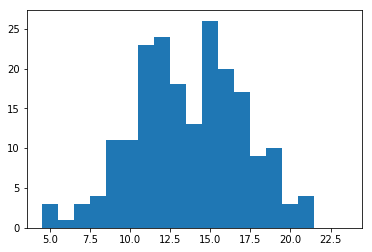

In [74]:
plt.hist(s,bins=np.arange(ndados,6*ndados)+0.5);

Comparamos con la teoría:

In [75]:
from scipy.stats import norm, randint

In [76]:
mu = s.mean()
print('teoría: {}, experimento: {:.2f}'.format(3.5*ndados, mu))

teoría: 14.0, experimento: 13.68


In [77]:
sigma = s.std()
tsigma_1_dado = randint(low=1,high=7).std()  # = np.sqrt(35)/np.sqrt(12)
tsigma = np.sqrt(ndados) * tsigma_1_dado
print('teoría: {}, experimento: {:.2f}'.format(tsigma, sigma ))

teoría: 3.415650255319866, experimento: 3.40


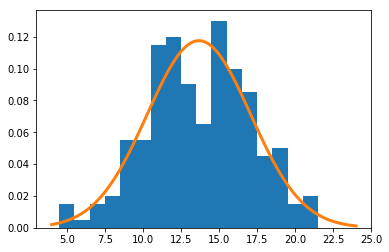

In [78]:
x = np.linspace(ndados,6*ndados,100)

plt.hist(s,bins=np.arange(ndados,6*ndados)+0.5, density=True);

plt.plot(x,norm.pdf(x,mu,sigma),lw=3);

Veremos otros ejemplos de estas funciones en el tema dedicado al análisis de datos.

### Álgebra lineal

El submódulo `linalg` ofrece las operaciones usuales de álgebra lineal.

In [79]:
import scipy.linalg as la

Por ejemplo, podemos calcular fácilmente el módulo de un vector:

In [80]:
la.norm([1,2,3,4,5])

7.416198487095663

o el determinante de una matriz:

In [81]:
la.det([[1,2],
        [3,4]])

-2.0

Observa que muchas de las funciones que trabajan con arrays admiten también otros contenedores como listas o tuplas, que son transformadas automáticamente en arrays.

Un problema muy importante es la resolución de sistemas de ecuaciones lineales. Si tenemos que resolver un sistema como

$$
\begin{align*}
x + 2y &= 3\\
3x+4y  &= 5
\end{align*}
$$

Lo expresamos en forma matricial $AX=B$ y podemos resolverlo con la inversa de $A$, o directamente con `solve`.

In [82]:
m = np.array([[1,2],
              [3,4]])

In [83]:
m

array([[1, 2],
       [3, 4]])

In [84]:
la.inv(m)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [85]:
la.inv(m) @ np.array([3,5])

array([-1.,  2.])

Es mejor (más eficiente y numéricamente estable) usar la función `solve`:

In [86]:
la.solve(m,[3,5])

array([-1.,  2.])

La solución se debería mostrar como una columna, pero en Python los arrays de una dimensión se imprimen como una fila porque no siempre representan vectores matemáticos. Si lo preferimos podemos usar matrices de una sola columna.

In [87]:
x = la.solve(m,[[3],
                [5]])

x

array([[-1.],
       [ 2.]])

In [88]:
m @ x

array([[3.],
       [5.]])

Si el lado derecho de la ecuación matricial $A X = B$ es una matriz, la solución $X$ también lo será.

### Computación matricial *

Python proporciona una [amplia colección](https://docs.scipy.org/doc/scipy/reference/linalg.html) de funciones de álgebra lineal numérica.

In [89]:
la.eigh([[1,2],
         [2,3]])

(array([-0.23606798,  4.23606798]), array([[-0.85065081,  0.52573111],
        [ 0.52573111,  0.85065081]]))

In [90]:
la.eig([[1,2],
        [7,1]])

(array([ 4.74165739+0.j, -2.74165739+0.j]), array([[ 0.47140452, -0.47140452],
        [ 0.8819171 ,  0.8819171 ]]))

In [91]:
np.sqrt([[1,2],
         [3,4]])

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [92]:
r = la.sqrtm([[1,2],
              [2,6]])
r

array([[0.77007615, 0.63795197],
       [0.63795197, 2.36495608]])

In [93]:
r @ r

array([[1., 2.],
       [2., 6.]])

### Caso de estudio: mínimos cuadrados *

Como ejemplo de uso de las herramientas de álgebra lineal realizaremos el ajuste de un modelo polinomial a unas observaciones ficticias. Encontraremos la solución de mínimo error cuadrático a un sistema de ecuaciones sobredeterminado.

En primer lugar generamos unos datos de prueba artificiales que simulan observaciones contaminadas con ruido de una función no lineal.

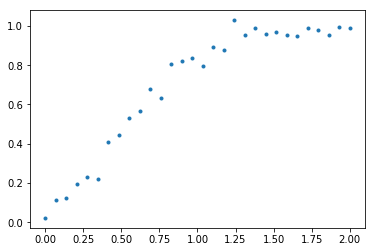

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0,2,30)

y = np.sin(x) + 0.05*np.random.randn(x.size)

plt.plot(x,y,'.');

Vamos a ajustar un modelo del tipo $y = ax^2 + bx + c$. Los coeficientes desconocidos $a$, $b$ y $c$ se pueden obtener resolviendo un sistema de ecuaciones lineales.

La matriz de coeficientes tiene potencias de $x$ hasta el grado que nos interesa.

In [95]:
A = np.vstack([x**2, x, np.ones(x.size)]).T

A

array([[0.        , 0.        , 1.        ],
       [0.00475624, 0.06896552, 1.        ],
       [0.01902497, 0.13793103, 1.        ],
       [0.04280618, 0.20689655, 1.        ],
       [0.07609988, 0.27586207, 1.        ],
       [0.11890606, 0.34482759, 1.        ],
       [0.17122473, 0.4137931 , 1.        ],
       [0.23305589, 0.48275862, 1.        ],
       [0.30439952, 0.55172414, 1.        ],
       [0.38525565, 0.62068966, 1.        ],
       [0.47562426, 0.68965517, 1.        ],
       [0.57550535, 0.75862069, 1.        ],
       [0.68489893, 0.82758621, 1.        ],
       [0.80380499, 0.89655172, 1.        ],
       [0.93222354, 0.96551724, 1.        ],
       [1.07015458, 1.03448276, 1.        ],
       [1.2175981 , 1.10344828, 1.        ],
       [1.3745541 , 1.17241379, 1.        ],
       [1.54102259, 1.24137931, 1.        ],
       [1.71700357, 1.31034483, 1.        ],
       [1.90249703, 1.37931034, 1.        ],
       [2.09750297, 1.44827586, 1.        ],
       [2.

En realidad es una matriz de Vandermonde:

In [96]:
np.vander(x,3)

array([[0.        , 0.        , 1.        ],
       [0.00475624, 0.06896552, 1.        ],
       [0.01902497, 0.13793103, 1.        ],
       [0.04280618, 0.20689655, 1.        ],
       [0.07609988, 0.27586207, 1.        ],
       [0.11890606, 0.34482759, 1.        ],
       [0.17122473, 0.4137931 , 1.        ],
       [0.23305589, 0.48275862, 1.        ],
       [0.30439952, 0.55172414, 1.        ],
       [0.38525565, 0.62068966, 1.        ],
       [0.47562426, 0.68965517, 1.        ],
       [0.57550535, 0.75862069, 1.        ],
       [0.68489893, 0.82758621, 1.        ],
       [0.80380499, 0.89655172, 1.        ],
       [0.93222354, 0.96551724, 1.        ],
       [1.07015458, 1.03448276, 1.        ],
       [1.2175981 , 1.10344828, 1.        ],
       [1.3745541 , 1.17241379, 1.        ],
       [1.54102259, 1.24137931, 1.        ],
       [1.71700357, 1.31034483, 1.        ],
       [1.90249703, 1.37931034, 1.        ],
       [2.09750297, 1.44827586, 1.        ],
       [2.

El lado derecho del sistema es directamente el vector con los valores de $y$, la variable independiente del modelo.

In [97]:
B = np.array(y)

B

array([0.02227748, 0.1119416 , 0.12498257, 0.19641078, 0.22999624,
       0.2188628 , 0.40998705, 0.44382502, 0.52926752, 0.56707147,
       0.68080318, 0.63103337, 0.80369808, 0.81931516, 0.83743732,
       0.79777305, 0.89229173, 0.87758381, 1.02901947, 0.9541074 ,
       0.98923333, 0.96091253, 0.97023728, 0.95242771, 0.95027999,
       0.98997763, 0.98140078, 0.95583702, 0.99472092, 0.98922309])

El sistema que hay que resolver está sobredeterminado: tiene solo tres incógnitas y tantas ecuaciones como observaciones de la función.

$$A \begin{bmatrix}a\\b\\c\end{bmatrix}= B$$

La solución de [mínimo error cuadrático](https://en.wikipedia.org/wiki/Least_squares) para los coeficientes del modelo se obtiene de manera directa:

In [98]:
sol = la.lstsq(A,B)[0]

sol

array([-0.36241132,  1.22071395, -0.03210305])

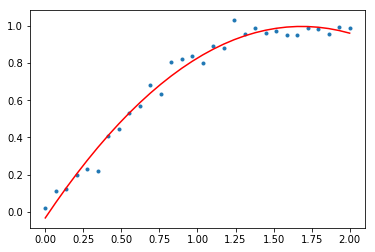

In [99]:
ye = A @ sol

plt.plot(x,y,'.',x,ye,'r');

Se puede experimentar con polinomios de mayor o menor grado.

Una forma de llegar a esta solución es resolver las "ecuaciones normales" del sistema
$Ax=b$. Como está sobredeterminado, vamos a minimizar el error cuadrático $E=||Ax-b||^2$, que es matemáticamente tratable. Hay que resolver

$$\frac{\partial E}{\partial x_k} =0 $$

Se puede comprobar que la solución es

$$x = A^+ b$$

donde $A^+$ es la [pseudoinversa](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_inverse) de $A$:

$$A^+ = (A^TA)^{-1}A^T$$


In [100]:
la.inv(A.T @ A) @ A.T @ B

array([-0.36241132,  1.22071395, -0.03210305])

In [101]:
la.pinv(A) @ B

array([-0.36241132,  1.22071395, -0.03210305])

En el tema dedicado al análisis de datos se muestra un ejemplo de ajuste de un modelo lineal por mínimos cuadrados usando el módulo `sklearn`.

### Implementación eficiente *

Las operaciones de `numpy` están "optimizadas" (escritas internamente en código C eficiente).

In [102]:
x = np.random.rand(10**8)

In [103]:
x

array([0.73266505, 0.62619323, 0.9807871 , ..., 0.84682994, 0.59431718,
       0.67825688])

In [104]:
%%time

np.mean(x)

CPU times: user 62.1 ms, sys: 841 µs, total: 62.9 ms
Wall time: 62.2 ms


0.4999819067656266

In [105]:
%%timeit

np.mean(x)

55.9 ms ± 309 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [106]:
%%timeit

x @ x

58.4 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Si la misma operación se realiza "manualmente" con instrucciones normales de Python requiere mucho más tiempo:

In [107]:
%%time

s = 0
for e in x:
    s += e
print(s/len(x))

0.4999819067656909
CPU times: user 18.1 s, sys: 0 ns, total: 18.1 s
Wall time: 18.1 s


Por tanto, si usamos los módulos apropiados los programas en Python no tienen por qué ser más lentos que los de otros lenguajes de programación. Python es "glue code", un pegamento para combinar bibliotecas de funciones, escritas en cualquier lenguaje, que resuelven eficientemente problemas específicos.

### Ejercicios

- Resuelve el sistema:

$$ 
\begin{align*}
x + 2y + 5z + 4w&= 24\\
y-z  &= 1 \\
2x+2y &= 6 \\
-x+2y+3w &= 15
\end{align*}
$$


- Escribe una función para calcular la distancia entre dos puntos de $\mathbb R^n$.


- Escribe un programa que calcule la letra del DNI ([aquí explican la forma de hacerlo](http://www.cespedes.org/dni2nif/)).


- Escribe un programa que encuentre el segundo mayor número contenido dentro de un array de enteros.


- Escribe una función que admita un array 2D $m$ y un escalar $s$ y extraiga las filas de $m$ cuya suma sea mayor $s$.


- A partir de los datos experimentales contenidos en `datos/hubble.txt` calcula el valor medio de redshift de las observaciones con velocidad < 5Km/s.


- Escribe una función para ordenar un array de enteros de menor a mayor.


- Escribe una función para calcular el [producto vectorial](http://en.wikipedia.org/wiki/Cross_product) de dos vectores.


- Escribe una función para calcular los coeficientes $l=(a,b,c)$, de la ecuación de la recta $ax+by+c=0$ que pasa por dos puntos $P=(x_1,y_1)$, $Q=(x_2,y_2)$ dados.


- Escribe una función para calcular el punto de intersección de dos rectas con coeficientes $l=(a,b,c)$ y  $l'=(a',b',c')$.


- Escribe una función para calcular la distancia de un punto $P=(x,y)$ a una recta $l=(a,b,c)$ y la proyección de P en la recta.


- Escribe una función para calcular la recta paralela a una recta $l$ que pasa por un punto $P$. Escribe una función para calcular la recta perpendicular a una recta $l$ que pasa por un punto $P$.


- Dado un triángulo definido por sus tres vértices $P$, $Q$ y $R$ calcula la longitud de una base $b$ y su correspondientes altura $h$ y comprueba que el área obtenida mediante la fórmula habitual $A=bh/2$ coincide con la de Herón.


- Calcula una aproximación numérica a la siguiente integral usando una [aproximación lineal a trozos](http://en.wikipedia.org/wiki/Trapezoidal_rule) con 20 intervalos:

  $$ \int_0^1 e^{-2x^2}\cos(3\pi x) dx $$



- Escribe una función para calcular la desviación típica de un conjunto de números.


- Un polinomio $p(x)$ de grado $n$ se puede representar mediante un vector de coeficientes de dimensión $n+1$. Escribe funciones para: **a)** calcular (los coeficientes de) la derivada del polinomio. **b)** calcular (los coeficientes de) la integral del polinomio. **c)** evaluar un polinomio en un valor concreto de $x$. **d)** multiplicar dos polinomios.


- Simula el lanzamiento de 5 dados mil veces, y comprueba gráficamente que la distribución de resultados de la puntuación total es aproximadamente normal.


- Determina mediante simulación qué suceso es más probable: **a)** obtener al menos un seis al lanzar 6 dados, **b)** obtener al menos 2 seises al lanzar 12 dados. **c)** obtener al menos 3 seises al lanzar 18 dados.
